In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale

from IPython.display import display, clear_output

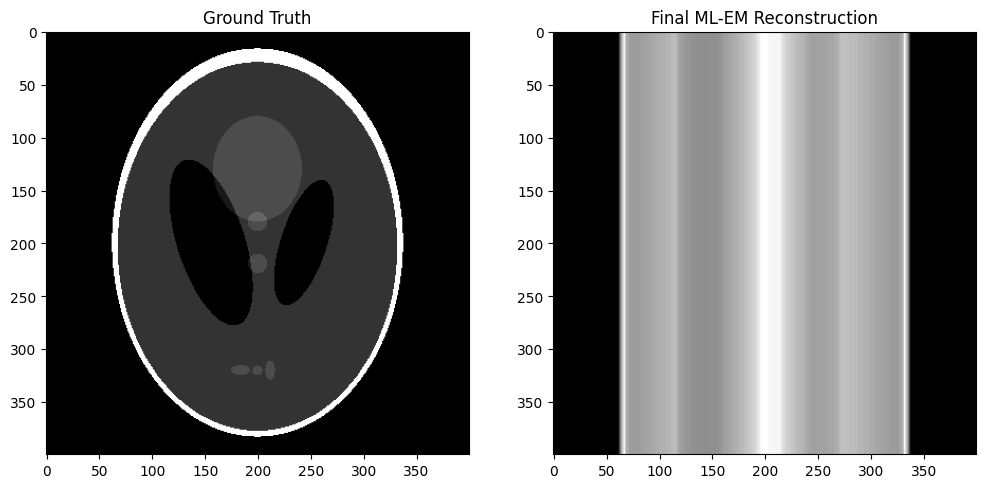

In [20]:
# Generate Shepp-Logan Phantom
image = shepp_logan_phantom()
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

# Initialize variables
x = np.ones_like(len(image))
A = np.ones_like(image)

# ML-EM Reconstruction
for i in range(100):
    yhat = A.dot(x)
    R = image / (yhat + 1e-8)
    x = x * (A.T.dot(R)) / (A.T.dot(np.ones_like(yhat)))

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Ground Truth')

plt.subplot(1, 2, 2)
plt.imshow(yhat, cmap='gray')
plt.title('Final ML-EM Reconstruction')

plt.show()

Text(0.5, 1.0, 'MLEM recon image 1')

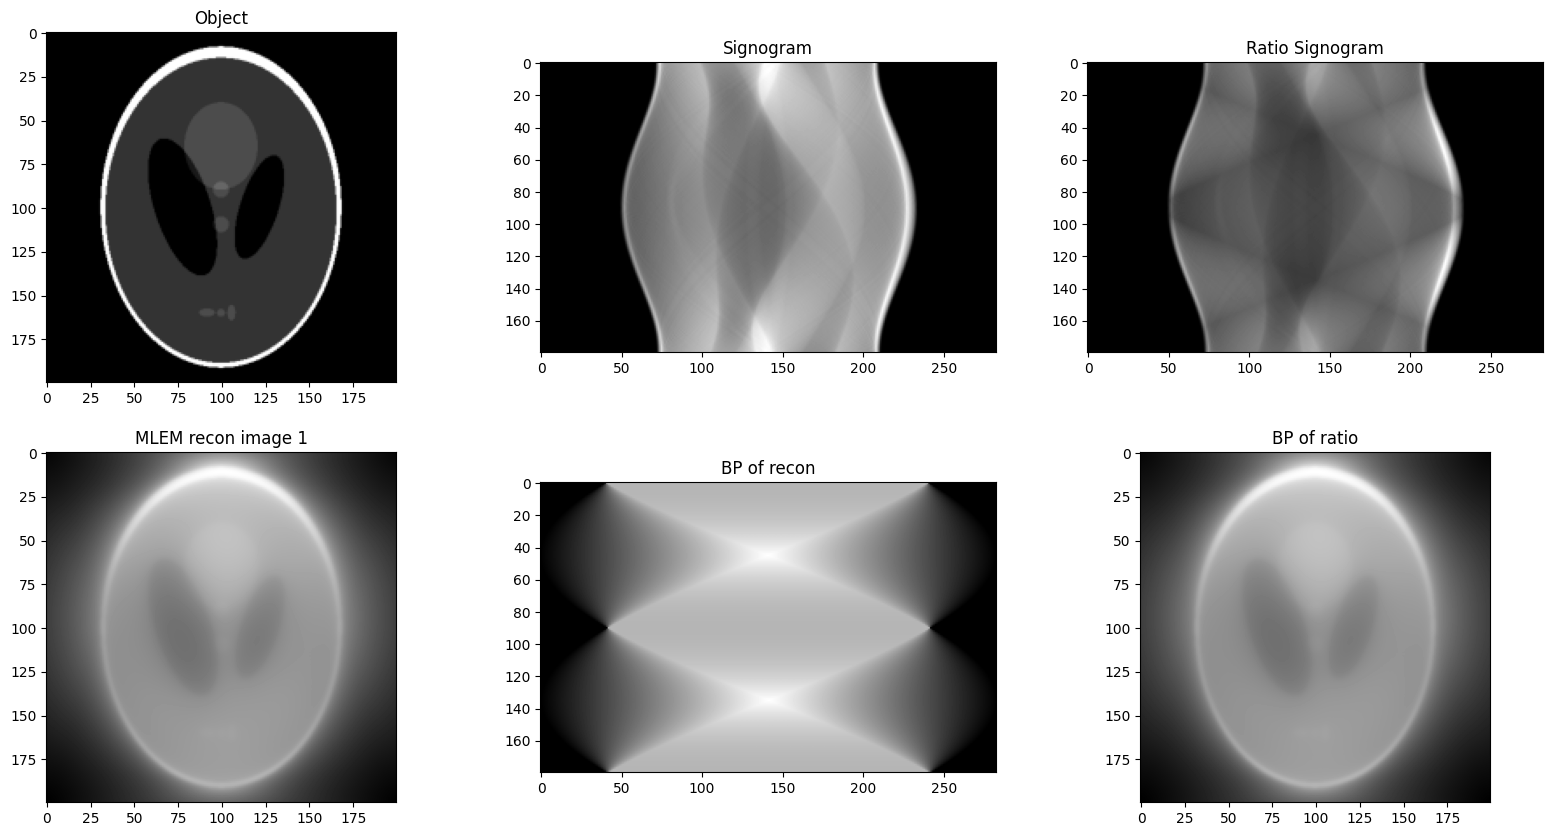

In [13]:
image = shepp_logan_phantom()
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

activation_level = 0.1
true_object = image
true_object = rescale(activation_level * true_object, 0.5)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].imshow(true_object, cmap='gray')
axs[0, 0].set_title("Object")

# Generate simulate signogam data
theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(true_object, theta=theta, circle=False)
axs[0, 1].imshow(sinogram.T, cmap='gray')
axs[0, 1].set_title("Signogram")


mlem_rec = np.ones(true_object.shape)
sino_ones = np.ones(sinogram.shape)
sens_image = iradon(sino_ones, theta=theta, circle=False, filter_name=None)

for iter in range(1):
    fb = radon(mlem_rec, theta, circle=False) # Forward
    ratio = sinogram / (fb + 1e-8)
    correction = iradon(ratio, theta, circle=False, filter_name=None) / sens_image
    mlem_rec *= correction

axs[1, 0].imshow(mlem_rec, cmap='gray')
axs[1, 0].set_title("MLEM recon")

axs[1, 1].imshow(fb.T, cmap='gray')
axs[1, 1].set_title("BP of recon")

axs[0, 2].imshow(ratio.T, cmap='gray')
axs[0, 2].set_title("Ratio Signogram")

axs[1, 2].imshow(correction, cmap='gray')
axs[1, 2].set_title("BP of ratio")

axs[1, 0].imshow(mlem_rec, cmap='gray')
axs[1, 0].set_title(f"MLEM recon image {iter + 1}")

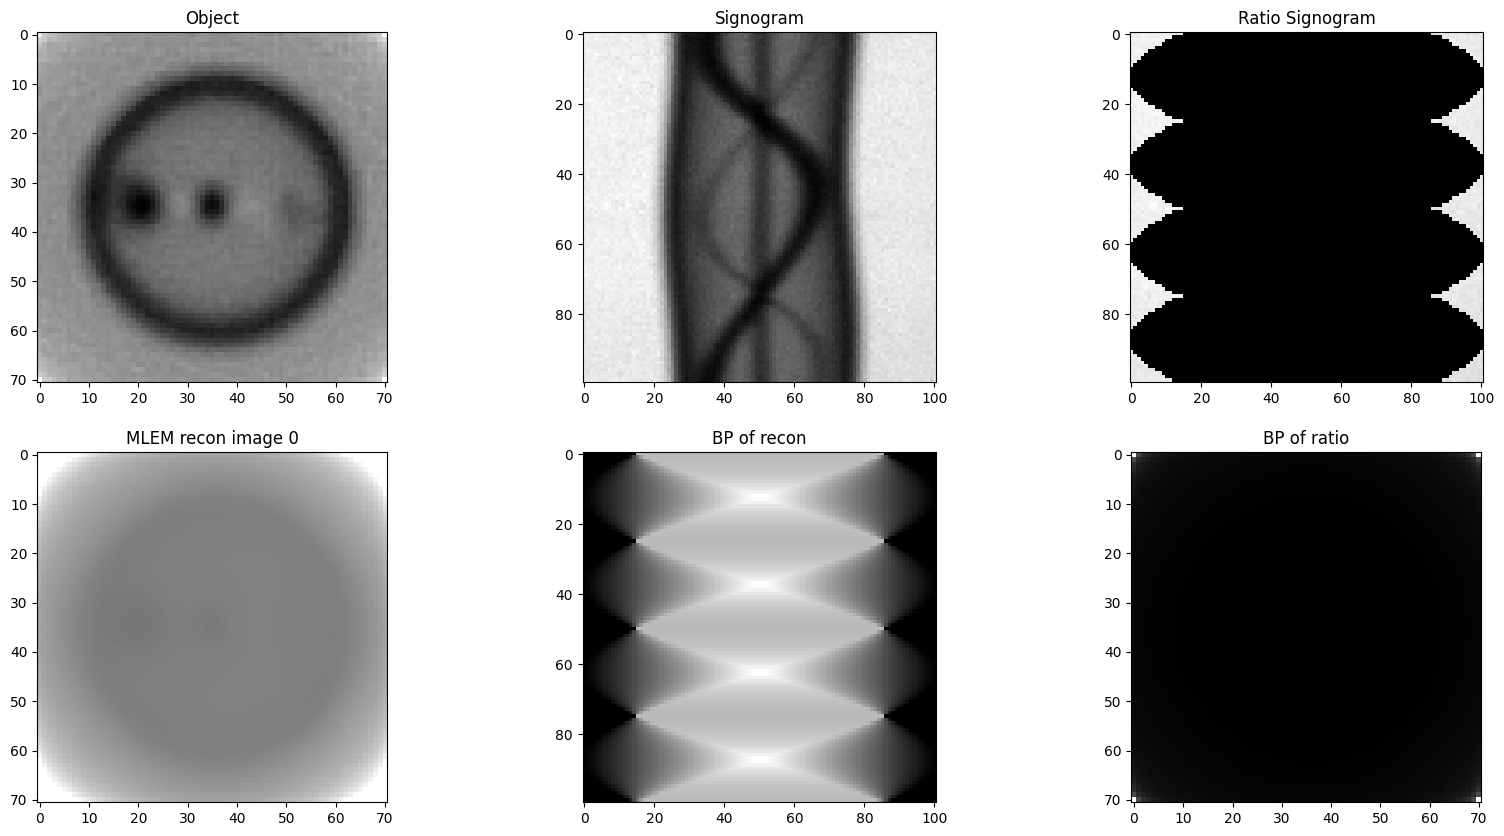

In [3]:
phantom1_sig = np.loadtxt("phantom1.txt", dtype=np.float32)
phantom1_sig = phantom1_sig.T
theta= np.linspace(0., 360., 100, endpoint=False)
image = iradon(phantom1_sig, theta=theta, filter_name="ramp", circle=False)

activation_level = 0.1
true_object = image
#true_object = rescale(activation_level * true_object, 0.5)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].imshow(true_object, cmap='gray')
axs[0, 0].set_title("Object")

# Generate simulate signogam data
axs[0, 1].imshow(phantom1_sig.T, cmap='gray')
axs[0, 1].set_title("Signogram")


mlem_rec = np.ones(image.shape)
sino_ones = np.ones(phantom1_sig.shape)
sens_image = iradon(sino_ones, theta=theta, circle=False, filter_name=None)

for iter in range(100):
    fb = radon(mlem_rec, theta, circle=False) # Forward
    ratio = phantom1_sig / (fb + 1e-8)
    correction = iradon(ratio, theta, circle=False, filter_name=None) / sens_image

    axs[1, 0].imshow(mlem_rec, cmap='gray')
    axs[1, 0].set_title("MLEM recon")

    axs[1, 1].imshow(fb.T, cmap='gray')
    axs[1, 1].set_title("BP of recon")

    axs[0, 2].imshow(ratio.T, cmap='gray')
    axs[0, 2].set_title("Ratio Signogram")

    axs[1, 2].imshow(correction, cmap='gray')
    axs[1, 2].set_title("BP of ratio")

    mlem_rec *= correction
    
    axs[1, 0].imshow(mlem_rec, cmap='gray', vmin=np.min(true_object), vmax=np.max(true_object))
    axs[1, 0].set_title(f"MLEM recon image {iter}")
    plt.show()